# 性能度量

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_iris()
data = dataset.data
target = dataset.target
features = dataset.feature_names

In [15]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.33, random_state=7)
model = DecisionTreeClassifier()
model.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 错误率和精度

In [3]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(target_test, model.predict(data_test))

0.94

In [16]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(target_test, model.predict(data_test))

0.9444444444444443

## 查准率和查全率

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
precision_score(target_test, model.predict(data_test), average='weighted')

0.9409287925696594

In [20]:
recall_score(target_test, model.predict(data_test), average='weighted')

0.94

## F1-score

In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

In [22]:
f1_score(target_test, model.predict(data_test), average='weighted')

0.939953667953668

In [24]:
fbeta_score(target_test, model.predict(data_test), beta=1, average='weighted')

0.939953667953668

In [25]:
fbeta_score(target_test, model.predict(data_test), beta=2, average='weighted')

0.939859241881714

In [26]:
fbeta_score(target_test, model.predict(data_test), beta=0.5, average='weighted')

0.9404156358238497

In [27]:
f1_score(target_test, model.predict(data_test), average='macro')

0.9444015444015443

In [28]:
f1_score(target_test, model.predict(data_test), average='micro')

0.94

### P-R 图

In [86]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.svm import LinearSVC
from inspect import signature

In [93]:
iris = load_iris()
X = iris.data
y = iris.target

# 添加噪声
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)
classifier = LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

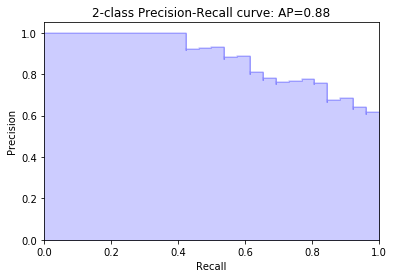

In [94]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

## 混淆矩阵

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(target_test, model.predict(data_test))

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 17]], dtype=int64)

In [100]:
set(target)

{0, 1, 2}

## 分类报告

In [115]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(target_test, model.predict(data_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.89      0.94      0.92        18

   micro avg       0.94      0.94      0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

